In [1]:
import pandas as pd
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import time

from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


                x1           x2            y
count  1000.000000  1000.000000  1000.000000
mean     -0.015111    -0.014789     0.002000
std       0.942958     0.942908     1.000498
min      -2.092731    -2.092731    -1.000000
25%      -0.800184    -0.800184    -1.000000
50%      -0.009416    -0.008302     1.000000
75%       0.768194     0.768194     1.000000
max       2.317667     2.317667     1.000000
                x1           x2          y
count  1000.000000  1000.000000  1000.0000
mean     -0.016506    -0.016793    -0.0200
std       0.976396     0.976349     1.0003
min      -2.290398    -2.290398    -1.0000
25%      -0.776719    -0.776719    -1.0000
50%      -0.019674    -0.019674    -1.0000
75%       0.770224     0.770224     1.0000
max       2.254728     2.254728     1.0000
                x1           x2            y
count  1000.000000  1000.000000  1000.000000
mean      0.062321     0.063700     0.038000
std       0.944107     0.943006     0.999778
min      -2.052424    -2.052

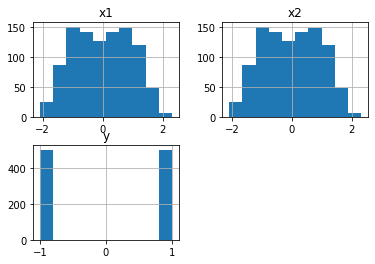

In [2]:
dados_teste = sio.loadmat('dados_teste.mat')
dados_treino = sio.loadmat('dados_treinamento.mat')
dados_valid = sio.loadmat('dados_val.mat')

x_teste = np.array(dados_teste["Xt"])
y_teste =  np.array(dados_teste["yt"])
x_treino =  np.array(dados_treino["X"])
y_treino =  np.array(dados_treino["y"])
x_valid =  np.array(dados_valid["Xval"])
y_valid =  np.array(dados_valid["yval"])


#
teste_df=pd.DataFrame(x_teste,columns=['x1','x2'])
teste_df['y']=y_teste
treino_df=pd.DataFrame(x_treino,columns=['x1','x2'])
treino_df['y']=y_treino
valid_df=pd.DataFrame(x_valid,columns=['x1','x2'])
valid_df['y']=y_valid
total_df=pd.DataFrame(x_teste,columns=['x1','x2'])
total_df['y']=y_teste
total_df.append(treino_df, ignore_index=True)
total_df.append(valid_df, ignore_index=True)

print(teste_df.describe())
print(treino_df.describe())
print(valid_df.describe())
print(total_df.describe())
print(total_df.hist())


In [3]:
def labelizer(input,positive_label,negative_label):
    input_intern=input
    for i in range(0,len(input)):
        if input[i]==positive_label:
            input_intern[i]=1
            
        if input[i]==negative_label:
            input_intern[i]=0            
    return input_intern

y_teste_rn=labelizer(y_teste,1,-1)
y_treino_rn=labelizer(y_treino,1,-1)
y_valid_rn=labelizer(y_valid,1,-1)


In [4]:
def cria_mlp(neuronios,otimizador='Adam',ativacao='relu'):
    rede_neural=Sequential()
    rede_neural.add(Dense(neuronios, input_dim=2, activation=ativacao))
    rede_neural.add(Dense(1, activation='sigmoid'))
    # Para entropia cruzada
    rede_neural.compile(loss='binary_crossentropy', optimizer=otimizador, metrics=['acc'])
    # Para o erro quadrático médio
#     rede_neural.compile(loss='mean_squared_error', optimizer=otimizador, metrics=['accuracy'])
    return rede_neural

def mostra_grafico_custo(historico):
    plt.plot(historico.history['loss'])
    plt.plot(historico.history['val_loss'])
    plt.title('Custo')
    plt.ylabel('Custo')
    plt.xlabel('Epoca')
    plt.yscale("log")
    plt.legend(['Treino', 'Validacao'], loc='upper left')
    plt.show()
def mostra_grafico_accuracy(historico):
    plt.plot(historico.history['acc'])
    plt.plot(historico.history['val_acc'])
    plt.title('Acurácia')
    plt.ylabel('Acurácia')
    plt.xlabel('Epoca')
    plt.yscale("log")
    plt.legend(['Treino', 'Validacao'], loc='upper left')
    plt.show()
def mostra_mensagem(historico):
    print("Custo final treino:")
    print(historico.history['loss'][-1])
    print("Custo final validação:")
    print(historico.history['val_loss'][-1])
    print("Acurácia final treino:")
    print(historico.history['acc'][-1])
    print("Acurácia final validação:")
    print(historico.history['val_acc'][-1])

def aplica_threshold(y,threshold):
    y_temp=y.copy()
    for i in range(0,len(y)):
        if y[i]>=threshold:
            y_temp[i]=1
        else:
            y_temp[i]=0
    return y_temp


Teste 1: Relu Adam
Tempo de treino: 123.07480239868164


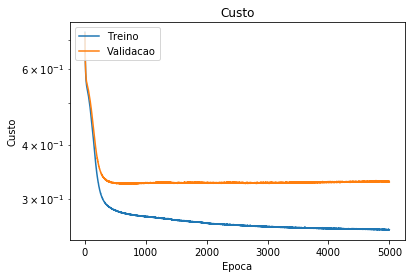

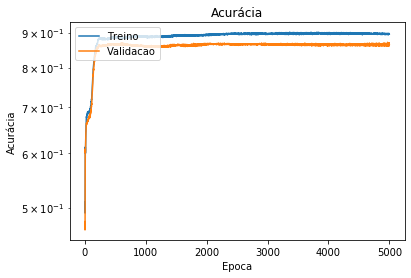

Custo final treino:
0.25424896478652953
Custo final validação:
0.3283083125948906
Acurácia final treino:
0.895
Acurácia final validação:
0.8640000224113464
Teste 2: Relu Sgd
Tempo de treino: 122.26525354385376


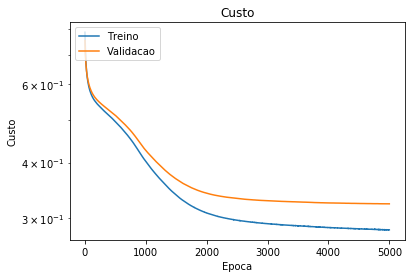

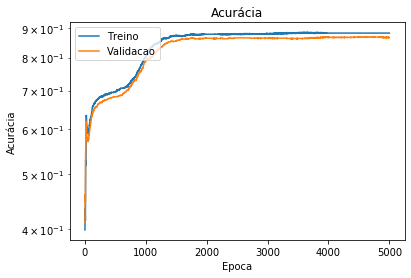

Custo final treino:
0.28203923255205154
Custo final validação:
0.32281906008720396
Acurácia final treino:
0.883
Acurácia final validação:
0.8669999837875366
Teste 3: Logistica Adam
Tempo de treino: 123.45243620872498


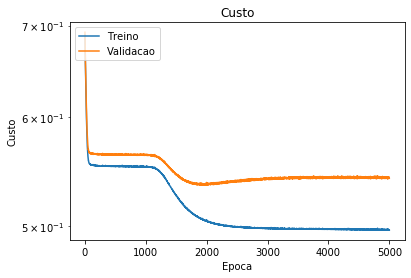

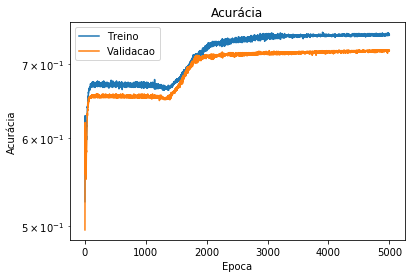

0.6922785997390747
Custo final treino:
0.4966223657131195
Custo final validação:
0.5415958732366561
Acurácia final treino:
0.744
Acurácia final validação:
0.7200000286102295
Teste 4: Logistica Sgd
Tempo de treino: 116.51936960220337


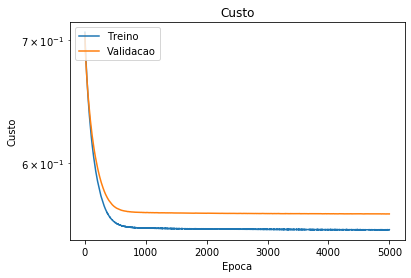

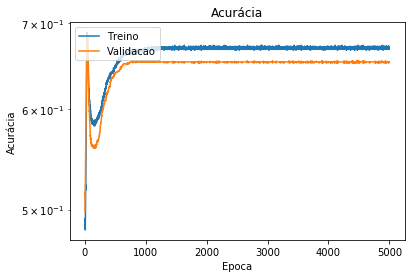

Custo final treino:
0.5524081617593766
Custo final validação:
0.5634213000535965
Acurácia final treino:
0.671
Acurácia final validação:
0.652999997138977


In [5]:
# Letra a
epocas=5000
tamanho_batch=100
neuronios=40
#Teste 1 ReLu Adam
print("Teste 1: Relu Adam")
rede_neural=cria_mlp(neuronios,otimizador='Adam',ativacao='relu')
#Rede com as labels alteradas
start_time=time.time()
historico=rede_neural.fit(x_treino, y_treino_rn,validation_data=(x_valid,y_valid_rn), epochs=epocas, batch_size=tamanho_batch, verbose=0)
print("Tempo de treino:",(time.time()-start_time))
mostra_grafico_custo(historico)
mostra_grafico_accuracy(historico)
mostra_mensagem(historico)

#Teste 2 Relu Sgd
print("Teste 2: Relu Sgd")
rede_neural = cria_mlp(neuronios,otimizador='sgd',ativacao='relu')
#Rede com as labels alteradas
start_time=time.time()
historico=rede_neural.fit(x_treino, y_treino_rn,validation_data=(x_valid,y_valid_rn), epochs=epocas, batch_size=tamanho_batch, verbose=0)
print("Tempo de treino:",(time.time()-start_time))
mostra_grafico_custo(historico)
mostra_grafico_accuracy(historico)
mostra_mensagem(historico)

#Teste 3 Logistica Adam
print("Teste 3: Logistica Adam")
rede_neural=cria_mlp(neuronios,otimizador='Adam',ativacao='sigmoid')
#Rede com as labels alteradas
start_time=time.time()
historico=rede_neural.fit(x_treino, y_treino_rn,validation_data=(x_valid,y_valid_rn), epochs=epocas, batch_size=tamanho_batch, verbose=0)
print("Tempo de treino:",(time.time()-start_time))
mostra_grafico_custo(historico)
mostra_grafico_accuracy(historico)
print(max(historico.history['val_loss']))
mostra_mensagem(historico)

#Teste 4 Logistica Sgd
print("Teste 4: Logistica Sgd")
rede_neural = cria_mlp(neuronios,otimizador='sgd',ativacao='sigmoid')
#Rede com as labels alteradas
start_time=time.time()
historico=rede_neural.fit(x_treino, y_treino_rn,validation_data=(x_valid,y_valid_rn), epochs=epocas, batch_size=tamanho_batch, verbose=0)
print("Tempo de treino:",(time.time()-start_time))
mostra_grafico_custo(historico)
mostra_grafico_accuracy(historico)
mostra_mensagem(historico)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x21c822f7ef0>)

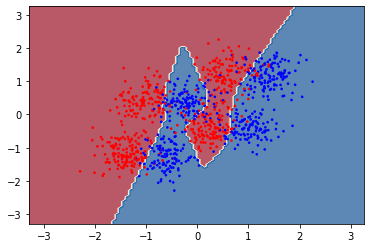

In [14]:
# Letra b
epocas=5000
tamanho_batch=100
rede_neural = cria_mlp(40,otimizador='sgd',ativacao='relu')
#Rede com as labels alteradas
historico=rede_neural.fit(x_treino, y_treino_rn,validation_data=(x_valid,y_valid_rn), epochs=epocas, batch_size=tamanho_batch, verbose=0)

def plot_decision_boundary(X, y, model, steps=1000, cmap='Paired'):
    cmap = plt.get_cmap(cmap)

    # Define region of interest by data limits
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = aplica_threshold(model.predict(np.c_[xx.ravel(), yy.ravel()]),0.5)

    # Plot decision boundary in region of interest
    z = labels.reshape(xx.shape)

    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.7)

    # Get predicted labels on training data and plot
    train_labels = model.predict(X)
    colors = ['blue' if label == 1 else 'red' for label in y]
    ax.scatter(X[:,0], X[:,1], s=7, c=colors, cmap=cmap, lw=0)

    return fig, ax


plot_decision_boundary(x_treino,y_treino_rn,rede_neural,steps=100,cmap='RdBu')


In [44]:
#Letra c
print(rede_neural.evaluate(x_teste, y_teste_rn))
y=rede_neural.predict(x_teste)
print(confusion_matrix(aplica_threshold(y,0.5),y_teste_rn))
tn, fp, fn, tp = confusion_matrix(aplica_threshold(y,0.5),y_teste_rn).ravel()
print("Erro Percentual:")
print((fp+fn)/(tn+fp+fn+tp))

1000/1000 [==============================] - 0s 21us/step
[0.30171727311611174, 0.8880000114440918]
[[444  57]
 [ 55 444]]
Erro Percentual:
0.112


In [8]:
# Letra d
neuronios=[1,5,10,20,40,80,160,320,640]
# neuronios=['10','20']
epocas=5000
tamanho_batch=100
#ENTENDER MELHOR COMO ESSA VARIAÇÃO INFLUENCIA A PARADA
variacao=0.000001
paciencia=500
relatorio=pd.DataFrame(columns=['Neuronios','Acurácia Treino','Acurácia Validação','Acurácia Teste'])
k=-1
for i in neuronios:
    k+=1
    print("Numero Neuronios")
    print(i)
    relatorio.loc[k,'Neuronios']=i
    rede_neural = cria_mlp(int(i),otimizador='sgd',ativacao='relu')
    es = EarlyStopping(monitor='val_accuracy', mode='auto', min_delta=variacao,patience=paciencia, verbose=1)
    mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)
    historico=rede_neural.fit(x_treino, y_treino_rn,validation_data=(x_valid,y_valid_rn), epochs=epocas, batch_size=tamanho_batch,callbacks=[es,mc], verbose=0)
    rede_neural=load_model('best_model.h5')
#     O primeiro valor é o custo o segundo a acurácia
    relatorio.loc[k,'Acurácia Treino']=rede_neural.evaluate(x_treino,y_treino_rn,verbose=0)[1]
    relatorio.loc[k,'Acurácia Validação']=rede_neural.evaluate(x_valid,y_valid_rn,verbose=0)[1]
    relatorio.loc[k,'Acurácia Teste']=rede_neural.evaluate(x_teste,y_teste_rn,verbose=0)[1]
print(relatorio)

Numero Neuronios
1
Epoch 01072: early stopping
Numero Neuronios
5
Epoch 01979: early stopping
Numero Neuronios
10
Epoch 03395: early stopping
Numero Neuronios
20
Epoch 02252: early stopping
Numero Neuronios
40
Epoch 02622: early stopping
Numero Neuronios
80
Epoch 02107: early stopping
Numero Neuronios
160
Epoch 03071: early stopping
Numero Neuronios
320
Epoch 02155: early stopping
Numero Neuronios
640
Epoch 02229: early stopping
  Neuronios Acurácia Treino Acurácia Validação Acurácia Teste
0         1           0.693              0.686          0.687
1         5           0.861              0.851          0.857
2        10            0.88              0.872          0.875
3        20           0.879              0.859          0.863
4        40           0.875              0.863          0.868
5        80           0.873              0.865          0.866
6       160           0.881              0.867           0.88
7       320           0.877              0.865          0.868
8       6

In [45]:
# #Teste, após este teste vimos que cada neurônio implementa o bias e de fato temos que colocar as lavbels corretamente 0,1.

# teste=Sequential()
# teste.add(Dense(1, input_dim=1, activation='sigmoid'))
# teste.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
# x=np.array([0,1])
# y=np.array([-1,1])
# historico=teste.fit(x,y, epochs=100, batch_size=10)
# print(teste.predict([0,1]))
# for layer in teste.layers:
#     print(layer.get_weights())

In [31]:
print(y_treino.shape)

(1000, 1)


[LibSVM]

C:\Users\Unisoma\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: UserWarning: No contour levels were found within the data range.


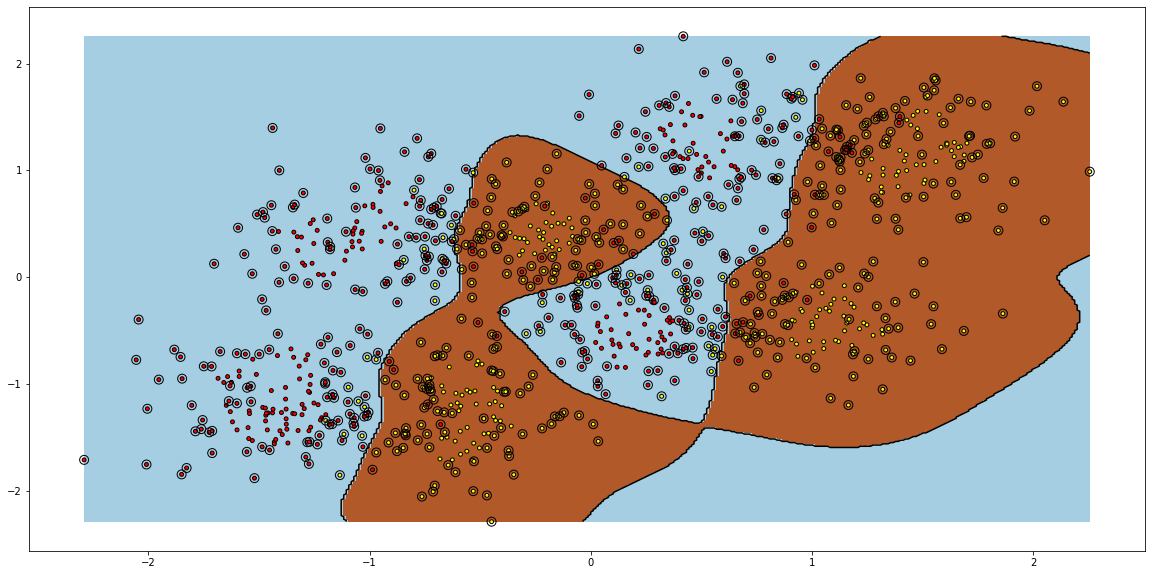

acuracia validação
0.876
acuracia teste
0.888


In [22]:
from sklearn.svm import SVC # "Support vector classifier"
# x=np.array([[2,3],[1,1],[3,5]])
# print(x)
model = SVC(kernel='rbf', C=0.1, gamma=10, verbose=1)
model.fit(x_treino,y_treino[:,0])


def plot_fig(X,y,clf):
    plt.figure(figsize=(20,10))
    plt.clf()
#     plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
#                 edgecolor='k', s=15)
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap='autumn',
                 edgecolor='k', s=15)
    # Circle out support vectors
    plt.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:400j, y_min:y_max:400j]
#     Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z= clf.predict(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['-'], levels=[0])
    
#     plt.title(kernel)
    plt.show()
plot_fig(x_treino,y_treino[:,0],model)
# print(model.decision_function(x_teste))
#Validação
saida=model.predict(x_valid)
for i in range(0,len(saida)):
    if saida[i]>0:
        saida[i]=1
    if saida[i]<=0:
        saida[i]=0            
tn, fp, fn, tp=confusion_matrix(saida,y_valid[:,0]).ravel()
print("acuracia validação")
print((tp+tn)/(tn+fp+fn+tp))


#Teste
saida=model.predict(x_teste)
for i in range(0,len(saida)):
    if saida[i]>0:
        saida[i]=1
    if saida[i]<=0:
        saida[i]=0            
tn, fp, fn, tp=confusion_matrix(saida,y_teste[:,0]).ravel()
print("acuracia teste")
print((tp+tn)/(tn+fp+fn+tp))


In [70]:
from sklearn.svm import SVC # "Support vector classifier"
# c_list=[0.1,0.5,1]
# kernells=[rbf,polynomial,sigmoid]
# relatorio=pd.DataFrame(columns=['kernell','C'])
# l=-1
# for k in kernells:
#     for i in c_list:
#         l+=1
model = SVC(kernel='rbf', C=1, verbose=1)
model.fit(x_treino,y_treino[:,0])
saida=model.decision_function(x_valid)
for i in range(0,len(saida)):
    if saida[i]>0:
        saida[i]=1
    if saida[i]<=0:
        saida[i]=0            
print(confusion_matrix(saida,y_valid[:,0]))
print(y_valid)
print(saida)

C:\Users\Unisoma\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[LibSVM][[  0   0   0]
 [403   0  76]
 [ 78   0 443]]
[[ 1]
 [ 1]
 [ 1]
 [-1]
 [-1]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [-1]
 [ 1]
 [-1]
 [ 1]
 [-1]
 [-1]
 [ 1]
 [-1]
 [-1]
 [-1]
 [-1]
 [ 1]
 [ 1]
 [-1]
 [-1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [-1]
 [-1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [-1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [-1]
 [ 1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [ 1]
 [-1]
 [-1]
 [-1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [-1]
 [-1]
 [-1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [-1]
 [ 1]
 [-1]
 [-1]
 [-1]
 [-1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [-1]
 [-1]
 [ 1]
 [ 1]
 [-1]
 [-1]
 [-1]
 [ 1]
 [ 1]
 [-1]
 [-1]
 [-1]
 [ 1]
 [-1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [ 1]
 [-1]
 [-1]
 [-1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [-1]
 [-1]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [ 1]
 [ 1